In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy.stats import pearsonr

df = pd.read_csv("gym_members_exercise_tracking.csv")

In [3]:
df

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,24,Male,87.1,1.74,187,158,67,1.57,1364.0,Strength,10.0,3.5,4,3,28.77
969,25,Male,66.6,1.61,184,166,56,1.38,1260.0,Strength,25.0,3.0,2,1,25.69
970,59,Female,60.4,1.76,194,120,53,1.72,929.0,Cardio,18.8,2.7,5,3,19.50
971,32,Male,126.4,1.83,198,146,62,1.10,883.0,HIIT,28.2,2.1,3,2,37.74


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

In [7]:
df.describe()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
count,973.000000,973.000000,973.00000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000
mean,38.683453,73.854676,1.72258,179.883864,143.766701,62.223022,1.256423,905.422405,24.976773,2.626619,3.321686,1.809866,24.912127
std,12.180928,21.207500,0.12772,11.525686,14.345101,7.327060,0.343033,272.641516,6.259419,0.600172,0.913047,0.739693,6.660879
min,18.000000,40.000000,1.50000,160.000000,120.000000,50.000000,0.500000,303.000000,10.000000,1.500000,2.000000,1.000000,12.320000
25%,28.000000,58.100000,1.62000,170.000000,131.000000,56.000000,1.040000,720.000000,21.300000,2.200000,3.000000,1.000000,20.110000
50%,40.000000,70.000000,1.71000,180.000000,143.000000,62.000000,1.260000,893.000000,26.200000,2.600000,3.000000,2.000000,24.160000
75%,49.000000,86.000000,1.80000,190.000000,156.000000,68.000000,1.460000,1076.000000,29.300000,3.100000,4.000000,2.000000,28.560000
max,59.000000,129.900000,2.00000,199.000000,169.000000,74.000000,2.000000,1783.000000,35.000000,3.700000,5.000000,3.000000,49.840000


In [9]:
#Correlação entre Tempo de Exercício e Calorias Queimadas

correlacao, p_valor = pearsonr(df['Session_Duration (hours)'], df['Calories_Burned'])
print(f"Correlação: {correlacao:.4f}, p-valor: {p_valor:.4e}")

if p_valor < 0.05:
    print("A correlação é estatisticamente significativa (p < 0.05).")
    if correlacao > 0.7:
        print(f"A correlação forte positiva ({correlacao:.4f}) indica que há uma relação consistente: quanto mais tempo de exercício, maior o gasto calórico.")
    elif correlacao > 0.3:
        print(f"A correlação moderada positiva ({correlacao:.4f}) sugere uma tendência: quanto mais tempo de exercício, maior o gasto calórico.")
    else:
        print(f"A correlação é fraca ({correlacao:.4f}), indicando que a relação entre tempo e gasto calórico não é muito forte.")
else:
    print("Não há evidências estatísticas suficientes para afirmar que há uma correlação significativa entre o tempo de exercício e o gasto calórico.")

Correlação: 0.9081, p-valor: 0.0000e+00
A correlação é estatisticamente significativa (p < 0.05).
A correlação forte positiva (0.9081) indica que há uma relação consistente: quanto mais tempo de exercício, maior o gasto calórico.


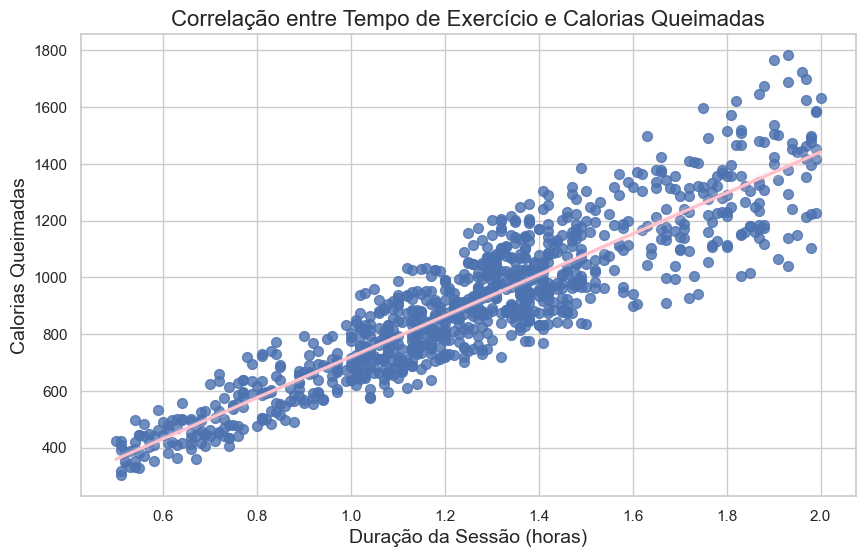

In [11]:
# Gerando um gráfico dessa correlação

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.regplot(x='Session_Duration (hours)', y='Calories_Burned', data=df, scatter_kws={'s': 50}, line_kws={'color': 'pink'})
plt.title('Correlação entre Tempo de Exercício e Calorias Queimadas', fontsize=16)
plt.xlabel('Duração da Sessão (horas)', fontsize=14)
plt.ylabel('Calorias Queimadas', fontsize=14)

plt.show()

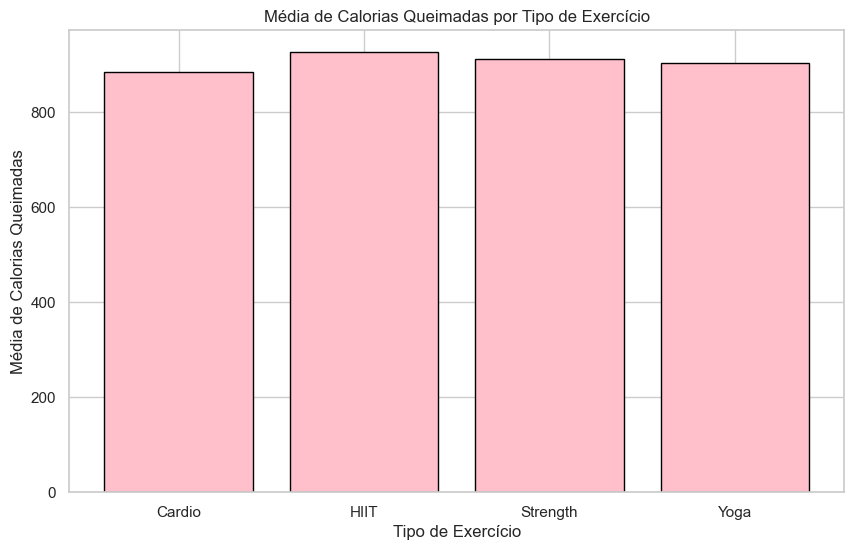

In [13]:
# Calculando médias de gasto calórico por tipo de exercício

avg_calories = df.groupby('Workout_Type')['Calories_Burned'].mean().reset_index()

plt.figure(figsize=(10,6))
plt.bar(avg_calories['Workout_Type'], avg_calories['Calories_Burned'], color='pink', edgecolor='black')
plt.xlabel('Tipo de Exercício')
plt.ylabel('Média de Calorias Queimadas')
plt.title('Média de Calorias Queimadas por Tipo de Exercício')
plt.show()

In [15]:
# Identificar o exercício com o maior gasto calórico

max_calories_exercise = avg_calories.loc[avg_calories['Calories_Burned'].idxmax()]
print(f"Exercício com maior gasto calórico: {max_calories_exercise['Workout_Type']}")

Exercício com maior gasto calórico: HIIT


In [17]:
# Realizando o teste ANOVA para comparar as médias de calorias queimadas entre os tipos de exercício

anova_result = stats.f_oneway(
    df[df['Workout_Type'] == 'Yoga']['Calories_Burned'],
    df[df['Workout_Type'] == 'HIIT']['Calories_Burned'],
    df[df['Workout_Type'] == 'Cardio']['Calories_Burned'],
    df[df['Workout_Type'] == 'Strength']['Calories_Burned']
)

print("Resultado do teste ANOVA:")
print("Estatística F:", anova_result.statistic)
print("p-valor:", anova_result.pvalue)

if anova_result.pvalue < 0.05:
    print("As diferenças de gasto calórico entre os tipos de exercício são estatisticamente significativas.")
else:
    print("Não há diferenças estatisticamente significativas no gasto calórico entre os tipos de exercício.")

Resultado do teste ANOVA:
Estatística F: 0.9490432300464533
p-valor: 0.4162395222885328
Não há diferenças estatisticamente significativas no gasto calórico entre os tipos de exercício.


In [19]:
# Correlação entre a Frequência de Atividade e o BMI
correlacao, p_valor = pearsonr(df['Workout_Frequency (days/week)'], df['BMI'])

print(f"Correlação: {correlacao:.4f}, p-valor: {p_valor:.4e}")

if p_valor < 0.05:
    print("A correlação é estatisticamente significativa (p < 0.05).")
    if correlacao > 0.7:
        print(f"A correlação forte positiva ({correlacao:.4f}) indica que há uma relação consistente: quanto maior a frequência de exercício, maior o BMI.")
    elif correlacao > 0.3:
        print(f"A correlação moderada positiva ({correlacao:.4f}) sugere uma tendência: quanto maior a frequência de exercício, maior o BMI.")
    else:
        print(f"A correlação é fraca ({correlacao:.4f}), indicando que a relação entre a frequência de exercício e o BMI não é muito forte.")
else:
    print("Não há evidências estatísticas suficientes para afirmar que há uma correlação significativa entre a frequência de atividade e o BMI.")


Correlação: 0.0016, p-valor: 9.5913e-01
Não há evidências estatísticas suficientes para afirmar que há uma correlação significativa entre a frequência de atividade e o BMI.


In [21]:
# Correlação de Spearman entre Frequencia de Exercício e Percentual de Gordura 
correlacao, p_valor = stats.spearmanr(df['Fat_Percentage'], df['Workout_Frequency (days/week)'])

print(f"Correlação de Spearman: {correlacao:.4f}, p-valor: {p_valor:.4e}")

# Interpretando os resultados
if p_valor < 0.05:
    print("A correlação é estatisticamente significativa (p < 0.05).")
    if correlacao > 0.7:
        print(f"A correlação forte positiva ({correlacao:.4f}) indica que, conforme a frequência de exercício aumenta, o percentual de gordura também tende a aumentar.")
    elif correlacao > 0.3:
        print(f"A correlação moderada positiva ({correlacao:.4f}) sugere uma tendência: conforme a frequência de exercício aumenta, o percentual de gordura tende a aumentar.")
    else:
        print(f"A correlação é fraca ({correlacao:.4f}), indicando que a relação entre frequência de exercício e percentual de gordura não é muito forte.")
else:
    print("Não há evidências estatísticas suficientes para afirmar que há uma correlação significativa entre a frequência de exercício e o percentual de gordura.")

Correlação de Spearman: -0.4438, p-valor: 3.1856e-48
A correlação é estatisticamente significativa (p < 0.05).
A correlação é fraca (-0.4438), indicando que a relação entre frequência de exercício e percentual de gordura não é muito forte.


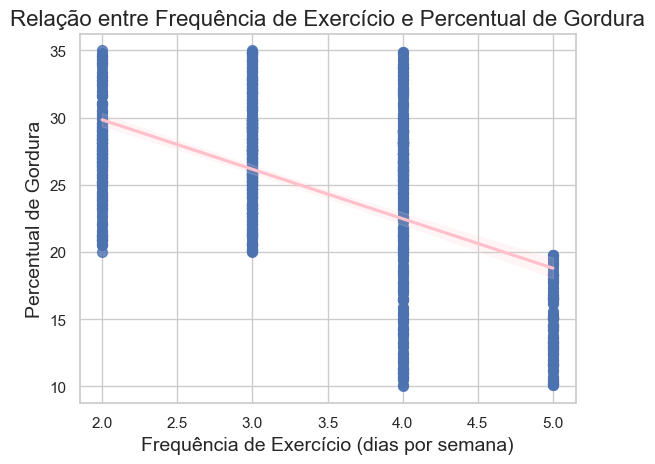

In [23]:
# Relação entre Frequencia de Exercício e Percentual de Gordura 

sns.regplot(x='Workout_Frequency (days/week)', y='Fat_Percentage', data=df, scatter_kws={'s': 50}, line_kws={'color': 'pink'})
plt.title('Relação entre Frequência de Exercício e Percentual de Gordura', fontsize=16)
plt.xlabel('Frequência de Exercício (dias por semana)', fontsize=14)
plt.ylabel('Percentual de Gordura', fontsize=14)
plt.show()

In [25]:
# Visualizando Dados

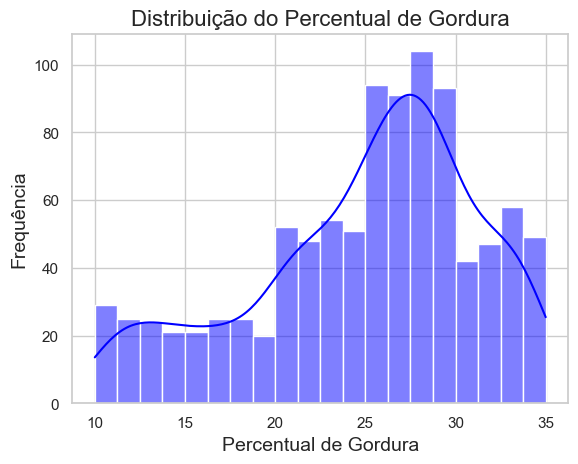

In [27]:
# Distribuição de Percentual de Gordura

sns.histplot(df['Fat_Percentage'], kde=True, bins=20, color='blue')
plt.title('Distribuição do Percentual de Gordura', fontsize=16)
plt.xlabel('Percentual de Gordura', fontsize=14)
plt.ylabel('Frequência', fontsize=14)
plt.show()

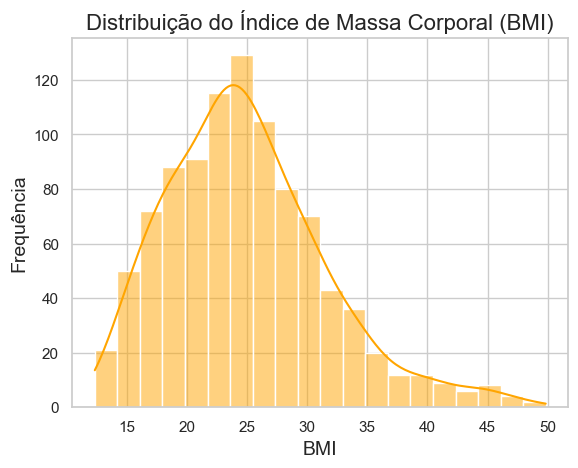

In [29]:
# Distribuição de BMI

sns.histplot(df['BMI'], kde=True, bins=20, color='orange')
plt.title('Distribuição do Índice de Massa Corporal (BMI)', fontsize=16)
plt.xlabel('BMI', fontsize=14)
plt.ylabel('Frequência', fontsize=14)
plt.show()


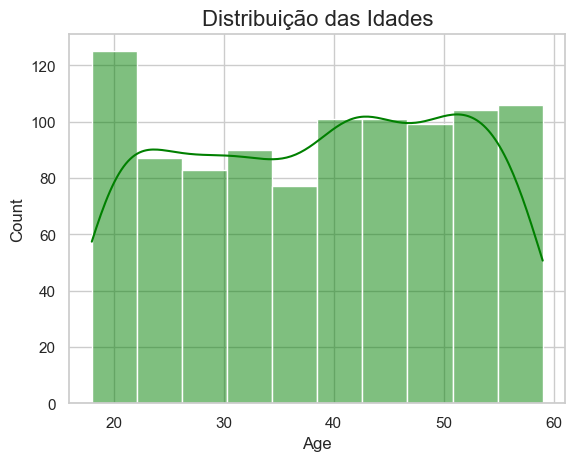

In [31]:
# Histograma da idade

sns.histplot(data=df, x='Age', kde=True, bins=10, color='green')
plt.title('Distribuição das Idades', fontsize=16)
plt.show()

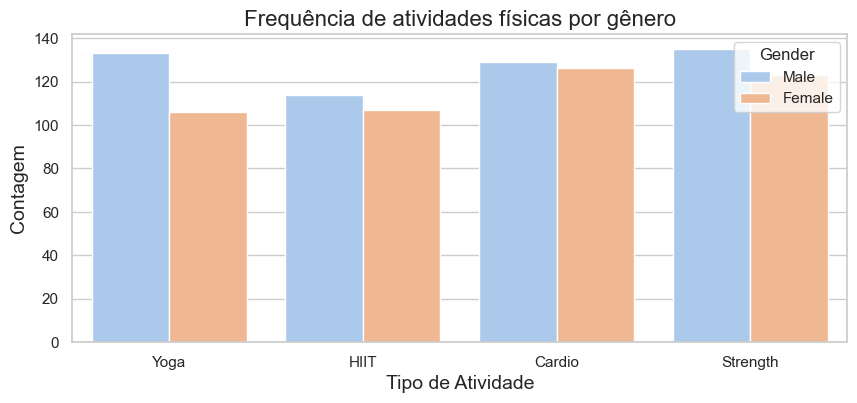

In [33]:
# Atividade por Gênero 

plt.figure(figsize=(10, 4))
sns.countplot(x='Workout_Type', hue='Gender', data=df, palette='pastel')
plt.title('Frequência de atividades físicas por gênero', fontsize=16)
plt.xlabel('Tipo de Atividade', fontsize=14)
plt.ylabel('Contagem', fontsize=14)
plt.show()